In [24]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Health_and_Personal_Care.json.gz')
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,ARMDSTEI0Z7YW,0077614992,dodo,"[0, 0]",This book was a requirement for a college class. It was okay to use although it wasn't used much for my particular class,5.0,great,1360886400,"02 15, 2013"
1,A3FYN0SZYWN74,0615208479,Marilyn Mitzel,"[0, 0]","This is a great gift for anyone who wants to hang on to what they've got or get back what they've lost. I bought it for my 77 year old mom who had a stroke and myself.I'm 55 and like many of us at that age my memory started slipping. You know how it goes. Can't remember where I put my keys, can't remember names and forget about numbers. As a medical reporter I was researching the importance of exercising the brain. I heard about BrainAerobics and that it can help improve and even restore memory. I had nothing to lose, nor did mom so we tried it and were actually amazed how well it works.My memory improved pretty quickly. I used to have to write notes to myself about every thing. Not any more. I can remember my grocery list and errands without writing it all down. I can even remember phone numbers now. You have to keep doing it. Just like going to the gym for your body several times a week, you must do the same for your brain.But it's a lot of fun and gives you a new sense of confid...",5.0,AMAZING HOW QUICKLY IT WORKS!,1228089600,"12 1, 2008"
2,A2J0WRZSAAHUAP,0615269990,icu-rn,"[0, 0]",Very helpful in learning about different disease processes and easy to understand. You do not have to be a med student to play. Also you can play alone or with several players,5.0,Must have,1396742400,"04 6, 2014"
3,A38RKP6G5P8J63,0615269990,JOSEPH A WONG,"[1, 1]","Occam's Razor is an unbelievably intuitive and enjoyable game that caters not only to medical professionals, but also to the general public. In medical translation, Occam's Razor is a principle of diagnosis, of trying to summarize multiple symptoms into one main problem. What makes Occam's Razor so versatile is that you can play the game in 4 DIFFERENT WAYS! You can play a spin-off of Gin Rummy, you can use the cards to a play a way that deduces a diagnosis, you can play on your own following a spin-off on solitaire, or you can play it as a spoons game.The card game comes with great visual directions that are easy to follow, diagnoses cards, and clinical cards. The pieces fit neatly into a box and is easy to bring around with you to any party or get-together.On a personal note, I am writing as a medical student. I brought the game over to my family's Thanksgiving party and played it almost during the entire time with my cousins. We played the &#34;spoons&#34; version of the game, w...",5.0,"Occam's Razor, a game for all ages and backgrounds!",1386115200,"12 4, 2013"
4,ARENM677YXZKX,0615269990,Sonny Patel,"[0, 0]","I met the guys from Nerdcore at a medical conference and was intrigued by the game. It comes with a stack of ddx cards and a stack of lab findings/pertinent positives. The #1 reason why I find it to have limited utility is that the larger deck is lab findings when it really should be ddx. The ONLY diagnostic ddx you can play/study are: acute appy, acute choly, ACS, leukemia, endocarditis, c.diff colitis, CAP, CHF, DKA, gout, PE, pylo, RA, and septic arthritis.The symptoms and presentation fore these diseases are pretty well known. In fact most 3rd and 4th year med students are already familiar with diagnosing and the work up for the above. It doesn't help you study for atypical presentations, lesser known tested diseases, zebras, etc. A good example of what what I'm talking about is how the deck only includes 1 cancer to study.In the end, I'm sending it back.",2.0,Very limited utility,1398297600,"04 24, 2014"
...,...,...,...,...,...,...,...,...,...
2982321,A3JAH75UZEDDE3,B00LV4480W,Elizabeth S. Karoll,"[0, 0]",Best lose weight product out here and there are no bad side effects!!!!,5.0,Five Stars,1405814400,"07 20, 2014"
2982322,A32X30YGYWDTC

## Specify product ID

In [4]:
df[df["asin"] == "B001KXZ808"].overall.value_counts()

overall
5.0    556
4.0     88
3.0     22
2.0     17
1.0     16
Name: count, dtype: int64

In [ ]:
# top_1000[top_1000["asin"] == "B001KXZ808"].overall.value_counts()
# ratings_distribution = {
#     5.0: 812,
#     4.0: 104,
#     1.0: 37,
#     3.0: 25,
#     2.0: 22
# }

# # Creating a bar graph
# plt.figure(figsize=(10, 6))  # Optional: Adjusts the size of the figure
# plt.bar(ratings_distribution.keys(), ratings_distribution.values(), color='blue')

# plt.xlabel('Rating')  # Label for the x-axis
# plt.ylabel('Count')  # Label for the y-axis
# plt.title('Distribution of overall score')  # Title of the graph
# plt.xticks(list(ratings_distribution.keys()))  # Ensure we have a tick for every rating value

# # Display the plot
# plt.show()

## Convert time and helpful data

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from datetime import datetime

# Message count analysis

# Count of messages per day
df_instance = df[df["asin"] == "B001KXZ808"]

# Convert timestamp strings to datetime objects for analysis
df_instance['reviewTime'] = pd.to_datetime(df_instance['reviewTime'], format='%m %d, %Y')
# Extract date, time, day of week, and hour for further analysis
df_instance['date'] =df_instance['reviewTime'].dt.date
df_instance['time'] = df_instance['reviewTime'].dt.time
df_instance['day_of_week'] = df_instance['reviewTime'].dt.day_name()

df_instance['helpful_division'] = df_instance['helpful'].apply(lambda x: x[0] / x[1] if x[0] != 0 else 0)
df_instance['helpful_division'].sort_values(axis=0, ascending=True)

1210551    We have had this scale for almost a year and a half; it is working really well overall. It is considerably more consistent and our favorite out of all of the scales that we have owned. Sometimes it does like to fluctuate the poundage on you and you have to weigh a few times to get a consistent reading. (Reason for the 4 not 5 stars.)My wife also says that one of her main downsides is that she feels like it is a little delicate with it being glass with our kids. But in saying that, with our kids, this scale gets rough housed and it is holding up very well.
Name: reviewText, dtype: object


/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/2609039263.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['reviewTime'] = pd.to_datetime(df_instance['reviewTime'], format='%m %d, %Y')
/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/2609039263.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instance['date'] =df_instance['reviewTime'].dt.date
/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/2609039263.py:15: SettingWithCopyWarning: 
A

## First 1000 rows, and Visualization

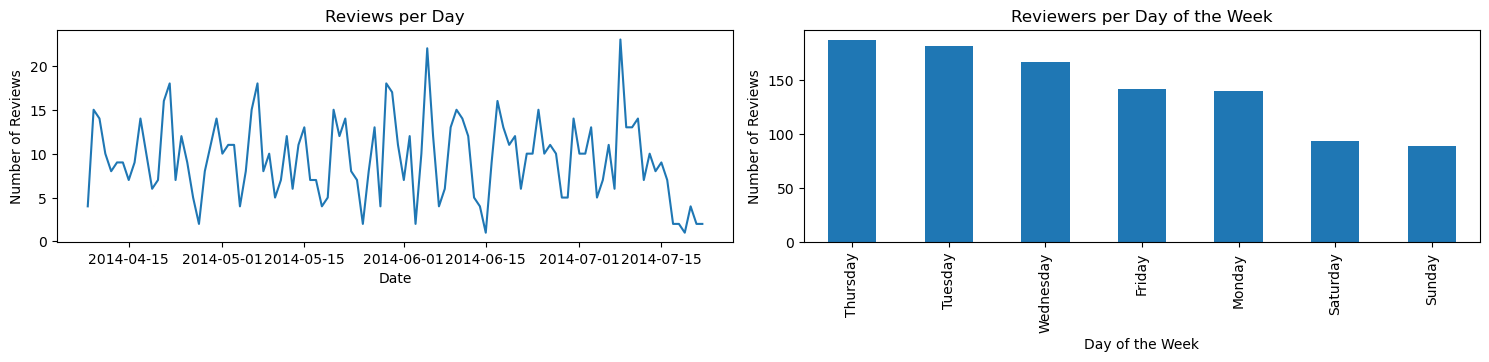

In [28]:
sorted_df =df_instance.sort_values(by='date', ascending=False)
top_1000 = sorted_df.head(1000)
pd.set_option('display.max_colwidth', 1000)
print(top_1000.head(1)['reviewText'])


reviewers_per_day = top_1000['date'].value_counts().sort_index()

# Count of messages per sender
reviewer_per_sender = top_1000['reviewerName'].value_counts()

# Count of messages per day of the week
reviewers_per_day_of_week = top_1000['day_of_week'].value_counts()


# Plotting the results for visual analysis
plt.figure(figsize=(15, 6))

# Messages per day
plt.subplot(2, 2, 1)
reviewers_per_day.plot(kind='line')
plt.title('Reviews per Day')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')

# # Messages per sender
# plt.subplot(2, 2, 2)
# reviewer_per_sender.plot(kind='bar')
# plt.title('Messages per Sender')
# plt.xlabel('Sender')
# plt.ylabel('Number of Messages')
# plt.xticks(rotation=45)

# Messages per day of the week
plt.subplot(2, 2, 2)
reviewers_per_day_of_week.plot(kind='bar')
plt.title('Reviewers per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Reviews')



plt.tight_layout()
plt.show()

## Sentiment Analysis

/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/3380500331.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['sentiment'] = top_1000['reviewText'].apply(lambda x: analyze_sentiment(x))
/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/3380500331.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['polarity'] = top_1000['sentiment'].apply(lambda x: x.polarity)
/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/3380500331.py:12: SettingWithCop

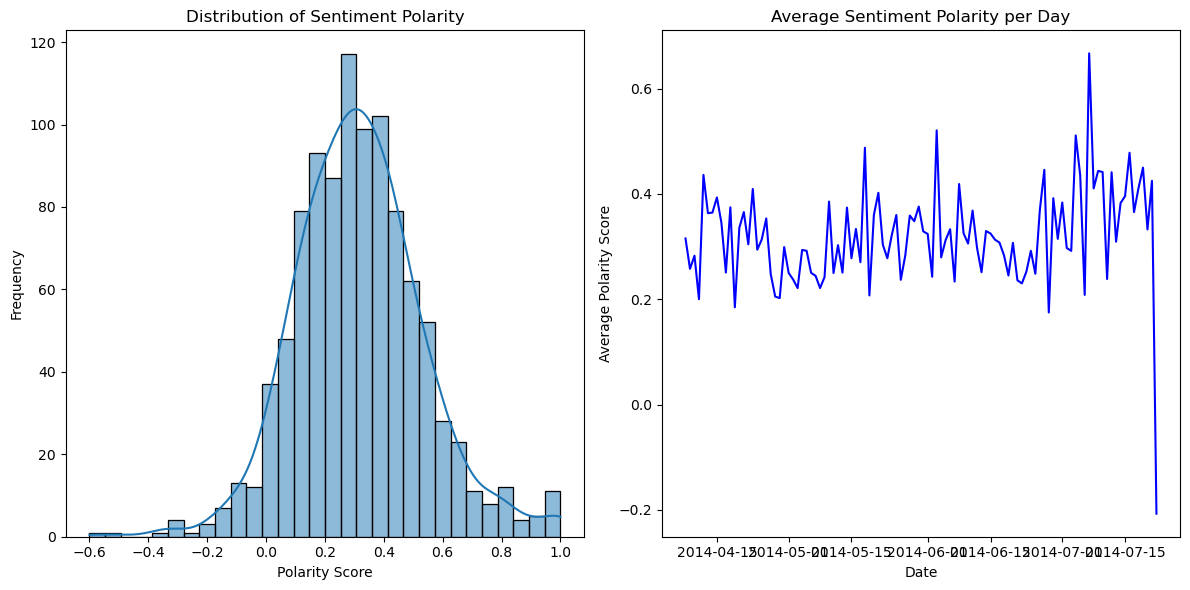

In [49]:
from textblob import TextBlob

# Sentiment Analysis Function
def analyze_sentiment(message):
    return TextBlob(message).sentiment

# Apply sentiment analysis to each message
top_1000['sentiment'] = top_1000['reviewText'].apply(lambda x: analyze_sentiment(x))

# Extracting sentiment polarity and subjectivity
top_1000['polarity'] = top_1000['sentiment'].apply(lambda x: x.polarity)
top_1000['subjectivity'] = top_1000['sentiment'].apply(lambda x: x.subjectivity)

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment Polarity Distribution
plt.figure(figsize=(12, 6))

# Distribution of Polarity Scores
plt.subplot(1, 2, 1)
sns.histplot(top_1000['polarity'], kde=True, bins=30)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity Score')
plt.ylabel('Frequency')

# Average Sentiment Polarity per Day
avg_polarity_per_day = top_1000.groupby('date')['polarity'].mean()
plt.subplot(1, 2, 2)
avg_polarity_per_day.plot(kind='line', color='blue')
plt.title('Average Sentiment Polarity per Day')
plt.xlabel('Date')
plt.ylabel('Average Polarity Score')

plt.tight_layout()
plt.show()

## Polarity encoding

In [50]:

def classify_polarity(polarity):
    if polarity < -0.2:
        return -1
    elif abs(polarity) <= 0.2:
        return 0
    else:
        return 1

top_1000['polarity_class'] = top_1000['polarity'].apply(classify_polarity)

/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/2733233379.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['polarity_class'] = top_1000['polarity'].apply(classify_polarity)


## Export the output csv file

In [51]:
selected_columns = ['asin','overall','date','time','day_of_week', 'helpful_division','polarity', 'polarity_class']
new_df = top_1000[selected_columns].copy()
new_df.to_csv("output.csv", index=False, encoding='utf-8-sig')

## Topic Modeling

In [30]:
# First, install necessary libraries
#!pip install gensim nltk

import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models.ldamodel import LdaModel

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Define a function for text preprocessing
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha()]  # Remove non-alphabetic tokens
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    return tokens

# Apply preprocessing to chat messages
top_1000['processed_message'] = top_1000['reviewText'].apply(preprocess_text)

# Creating a dictionary and corpus needed for topic modeling
dictionary = corpora.Dictionary(top_1000['processed_message'])
corpus = [dictionary.doc2bow(text) for text in top_1000['processed_message']]

# Running LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Displaying the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

[nltk_data] Downloading package punkt to /Users/lazayxc/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lazayxc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/vt/r70lh5gj76x4rj6xsby7b3v00000gn/T/ipykernel_95352/1741681043.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_1000['processed_message'] = top_1000['reviewText'].apply(preprocess_text)


(0, '0.029*"scale" + 0.016*"weight" + 0.011*"accurate" + 0.009*"good" + 0.008*"one"')
(1, '0.069*"scale" + 0.018*"weight" + 0.015*"one" + 0.014*"accurate" + 0.009*"like"')
(2, '0.051*"scale" + 0.032*"easy" + 0.020*"read" + 0.020*"weight" + 0.015*"accurate"')
(3, '0.043*"scale" + 0.014*"accurate" + 0.013*"good" + 0.012*"use" + 0.011*"step"')
(4, '0.024*"scale" + 0.022*"accurate" + 0.021*"easy" + 0.021*"recommend" + 0.020*"great"')


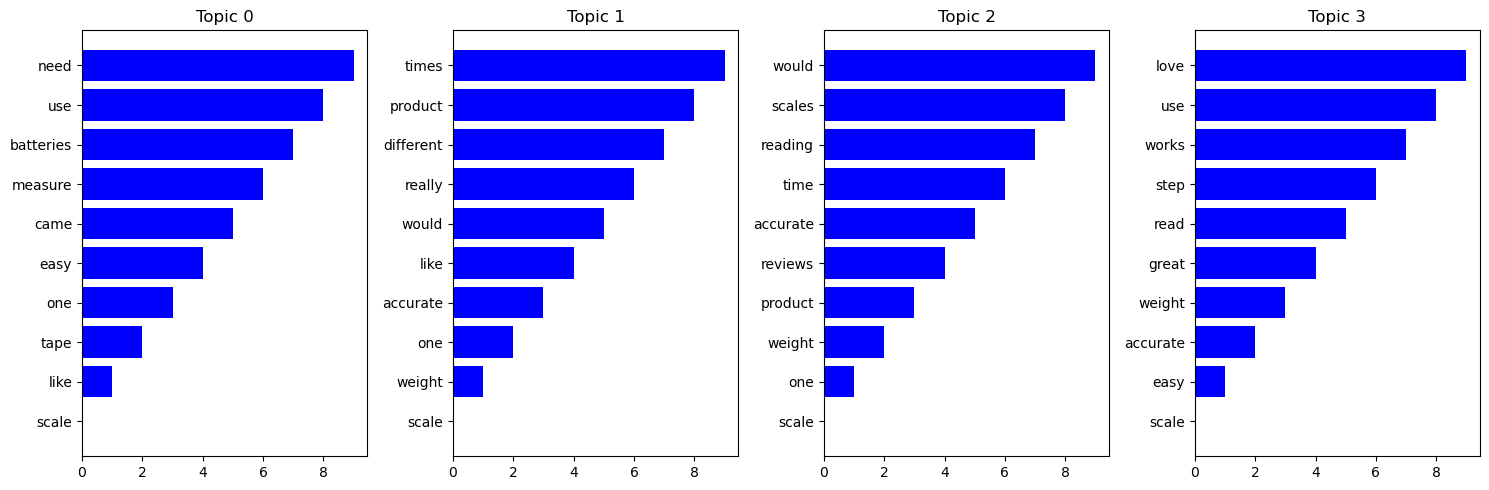

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Number of words to display per topic
num_words = 10

# Retrieve the words for each topic
topics = {i: [word for word, _ in lda_model.show_topic(i, topn=num_words)] for i in range(lda_model.num_topics)}

# Convert to DataFrame for easier plotting
topics_df = pd.DataFrame(topics)

# Plotting
plt.figure(figsize=(15, 5))
for i in topics_df.columns:
    plt.subplot(1, len(topics_df.columns), i+1)
    plt.barh(topics_df[i], range(len(topics_df[i])), color='blue')
    plt.title(f'Topic {i}')
    plt.yticks(range(len(topics_df[i])), topics_df[i])
plt.tight_layout()
plt.show()

## Metadata

In [ ]:
df3 = getDF('metadata.json.gz')
df3

In [ ]:
df3[df3["asin"] == "B001KXZ808"]